In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [9]:
import pandas as pd

df = pd.read_csv('AnnualTicketSales.csv')
df.head()


,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE,Unnamed: 5
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16,NaN
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16,NaN
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16,NaN
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11,NaN
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97,NaN


In [11]:
df.isnull().sum()

YEAR                                    0
TICKETS SOLD                            0
TOTAL BOX OFFICE                        0
TOTAL INFLATION ADJUSTED BOX OFFICE     0
AVERAGE TICKET PRICE                    0
Unnamed: 5                             27
dtype: int64

In [13]:
df.shape

(27, 6)

In [15]:
df.columns

Index(['YEAR', 'TICKETS SOLD', 'TOTAL BOX OFFICE',
       'TOTAL INFLATION ADJUSTED BOX OFFICE', 'AVERAGE TICKET PRICE',
       'Unnamed: 5'],
      dtype='object')

In [17]:
df.drop('Unnamed: 5', axis=1, inplace=True)
df.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,"42,37,74,881","$3,881,777,912","$3,881,777,912",$9.16
1,2020,"22,36,38,958","$2,048,534,616","$2,048,534,616",$9.16
2,2019,"1,22,85,41,629","$11,253,443,955","$11,253,444,050",$9.16
3,2018,"1,31,15,36,128","$11,948,096,650","$12,013,670,952",$9.11
4,2017,"1,22,56,39,761","$10,993,991,460","$11,226,860,216",$8.97


In [19]:
df.isnull().sum()

YEAR                                   0
TICKETS SOLD                           0
TOTAL BOX OFFICE                       0
TOTAL INFLATION ADJUSTED BOX OFFICE    0
AVERAGE TICKET PRICE                   0
dtype: int64

In [21]:
df.dtypes

YEAR                                    int64
TICKETS SOLD                           object
TOTAL BOX OFFICE                       object
TOTAL INFLATION ADJUSTED BOX OFFICE    object
AVERAGE TICKET PRICE                   object
dtype: object

In [23]:
def convertir_objetos_a_float(df):
    for columna in df.select_dtypes(include=["object"]).columns:
        try:
            df[columna] = df[columna].str.replace("[^\d.-]", "", regex=True).astype(float)
        except ValueError as e:
            print('No se pudo );')
    return df

# Esto es porque me daba notación científica y creo que con este formato es más fácil comprender los datos
pd.set_option("display.float_format", "{:.2f}".format)

convertir_objetos_a_float(df)
df.head()

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_23348\3028945795.py:4: SyntaxWarning: invalid escape sequence '\d'
  df[columna] = df[columna].str.replace("[^\d.-]", "", regex=True).astype(float)


,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
0,2021,423774881.00,3881777912.00,3881777912.00,9.16
1,2020,223638958.00,2048534616.00,2048534616.00,9.16
2,2019,1228541629.00,11253443955.00,11253444050.00,9.16
3,2018,1311536128.00,11948096650.00,12013670952.00,9.11
4,2017,1225639761.00,10993991460.00,11226860216.00,8.97


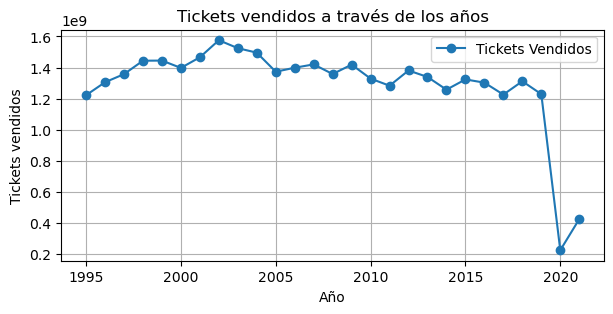

In [25]:
plt.figure(figsize=(7, 3))
plt.plot(df['YEAR'], df['TICKETS SOLD'], marker='o', label='Tickets Vendidos')

plt.title("Tickets vendidos a través de los años")
plt.xlabel("Año")
plt.ylabel("Tickets vendidos")
plt.grid(True)
plt.legend()
plt.show()

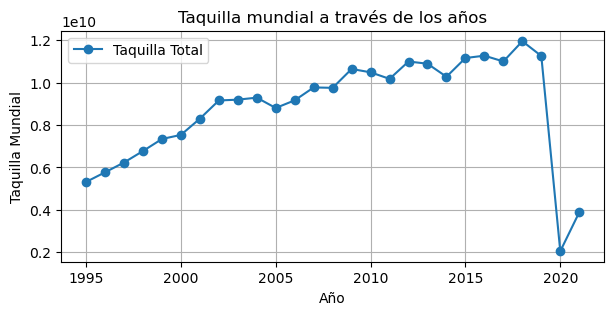

In [27]:
plt.figure(figsize=(7, 3))
plt.plot(df['YEAR'], df['TOTAL BOX OFFICE'], marker='o', label='Taquilla Total')

plt.title("Taquilla mundial a través de los años")
plt.xlabel("Año")
plt.ylabel("Taquilla Mundial")
plt.grid(True)
plt.legend()
plt.show()


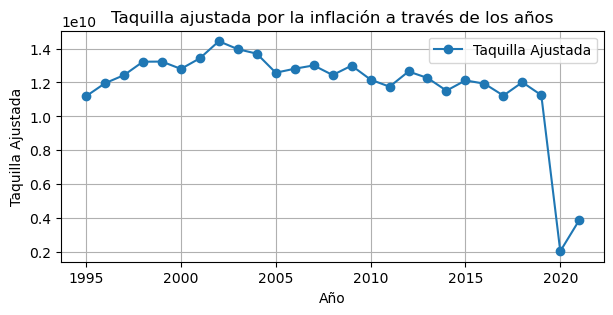

In [29]:
plt.figure(figsize=(7, 3))
plt.plot(df['YEAR'], df['TOTAL INFLATION ADJUSTED BOX OFFICE'], marker='o', label='Taquilla Ajustada')

plt.title("Taquilla ajustada por la inflación a través de los años")
plt.xlabel("Año")
plt.ylabel("Taquilla Ajustada")
plt.grid(True)
plt.legend()
plt.show()

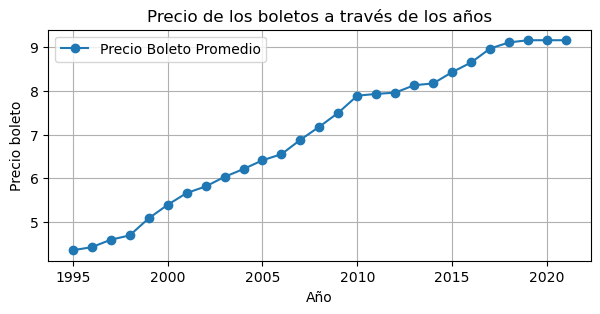

In [31]:
plt.figure(figsize=(7, 3))
plt.plot(df['YEAR'], df['AVERAGE TICKET PRICE'], marker='o', label='Precio Boleto Promedio')

plt.title("Precio de los boletos a través de los años")
plt.xlabel("Año")
plt.ylabel("Precio boleto")
plt.grid(True)
plt.legend()
plt.show()

In [33]:
df = df.sort_values('YEAR')
df.head()

,YEAR,TICKETS SOLD,TOTAL BOX OFFICE,TOTAL INFLATION ADJUSTED BOX OFFICE,AVERAGE TICKET PRICE
26,1995,1221705907.00,5314421390.00,11190826105.00,4.35
25,1996,1305221290.00,5769078886.00,11955781912.00,4.42
24,1997,1357349648.00,6230235770.00,12433322785.00,4.59
23,1998,1443832471.00,6771575283.00,13225505439.00,4.69
22,1999,1444664086.00,7338894852.00,13233123027.00,5.08


In [35]:
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(data[i + n_steps])
    return np.array(X), np.array(y)

n_steps = 3

data = df["TICKETS SOLD"].values
X, y = create_sequences(data, n_steps)

X = X.reshape((X.shape[0], X.shape[1], 1))

In [37]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_scaled = scaler.fit_transform(X.reshape(-1, 1)).reshape(X.shape)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [39]:
train_size = int(len(X_scaled) * 0.8)  # 80% para entrenamiento, 20% para prueba
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]

In [41]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\ThinkPad\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.fit(X_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.9301
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.8930
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.8570
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.8219
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.7878
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.7546
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.7223
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.6908
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.6602
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.6303
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.6011
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.5727
Epoch 13/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.5449
Epoch 14/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.5178
Epoch 15/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.4913
Epoch 16/200
1/1 ━━━━

In [45]:
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error en el conjunto de prueba: {mse}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 0.1920
Mean Squared Error en el conjunto de prueba: 0.19196955859661102


In [47]:
predictions_scaled = model.predict(X_test)

predictions = scaler.inverse_transform(predictions_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


In [49]:
test_dates = np.arange(2022, 2022 + len(predictions))

df_predictions = pd.DataFrame({
    "Fecha": test_dates,
    "Predicción": predictions.flatten()
})
df_predictions

,Fecha,Predicción
0,2022,1323372672.00
1,2023,1328969472.00
2,2024,1315271040.00
3,2025,1301624576.00
4,2026,1182315904.00


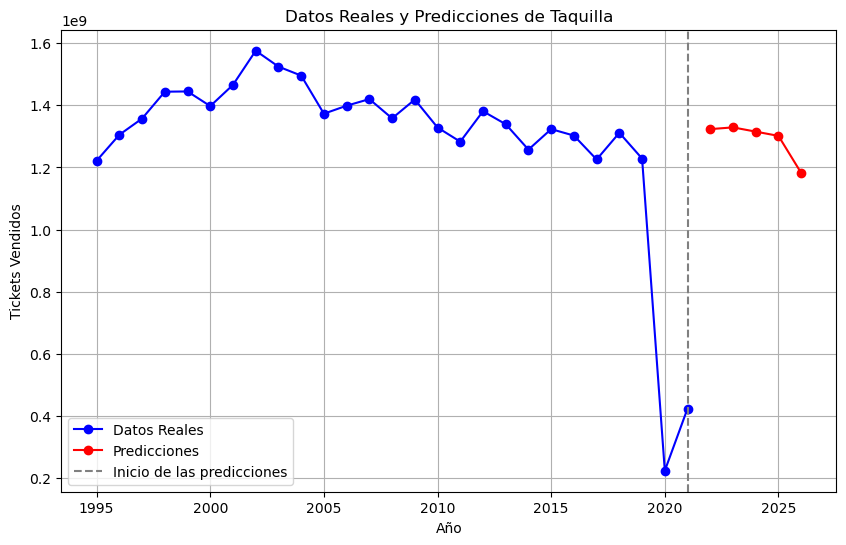

In [51]:
years_for_predictions = np.arange(2022, 2022 + len(predictions))

# Paso 2: Crear el DataFrame de las predicciones
predicted_data = pd.DataFrame({
    "YEAR": years_for_predictions,
    "Predicción": predictions.flatten()
})

# Paso 3: Extraer los datos reales (hasta 2021)
real_data = df[df['YEAR'] <= 2021]

# Paso 4: Graficar los datos reales (hasta 2021) en azul
plt.figure(figsize=(10, 6))
plt.plot(real_data['YEAR'], real_data['TICKETS SOLD'], label="Datos Reales", color='blue', marker='o')

# Paso 5: Graficar las predicciones (a partir de 2022) en rojo
plt.plot(predicted_data['YEAR'], predicted_data['Predicción'], label="Predicciones", color='red', marker='o')

# Paso 6: Marcar el cambio de color en 2021
plt.axvline(x=2021, color='gray', linestyle='--', label="Inicio de las predicciones")

# Paso 7: Configuración del gráfico
plt.title("Datos Reales y Predicciones de Taquilla")
plt.xlabel("Año")
plt.ylabel("Tickets Vendidos")
plt.legend()
plt.grid(True)

# Paso 8: Mostrar el gráfico
plt.show()